In [1]:
#pip install lxml

# Подключение библиотек

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Подготовка данных

In [3]:
netflix_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1GmbWQZU6U7DVl-a-9676eHzDxy3jhFCtgad3uuZVKoA/export?gid=862246344&format=csv')

In [4]:
netflix_data

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99
...,...,...,...,...,...,...,...,...
60,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48
62,us,United States,5818,3826,1992,8.99,13.99,17.99
63,uy,Uruguay,4989,3154,1835,8.99,12.99,15.99


In [5]:
salaries_data_list = pd.read_html('https://www.numbeo.com/cost-of-living/country_price_rankings?itemId=105')

In [6]:
salaries_data = salaries_data_list[1]

In [7]:
display(salaries_data)

,0,1,2,3
0,1.0,Switzerland,NaN,"6,269.84 $"
1,2.0,Singapore,NaN,"4,156.81 $"
2,3.0,Luxembourg,NaN,"4,069.45 $"
3,4.0,United States,NaN,"3,602.11 $"
4,5.0,Australia,NaN,"3,523.02 $"
...,...,...,...,...
102,103.0,Ethiopia,NaN,199.51 $
103,104.0,Pakistan,NaN,194.48 $
104,105.0,Nigeria,NaN,183.17 $
105,106.0,Uganda,NaN,149.31 $


In [8]:
url_continents = 'https://statisticstimes.com/geography/countries-by-continents.php'

In [9]:
continents_data_list = pd.read_html(url_continents, attrs = {'id':'table_id'})

In [10]:
continents_data = continents_data_list[0]

In [11]:
display(continents_data)

,No,Country or Area,ISO-alpha3 Code,M49 Code,Region 1,Region 2,Continent
0,1,Afghanistan,AFG,4,Southern Asia,NaN,Asia
1,2,Åland Islands,ALA,248,Northern Europe,NaN,Europe
2,3,Albania,ALB,8,Southern Europe,NaN,Europe
3,4,Algeria,DZA,12,Northern Africa,NaN,Africa
4,5,American Samoa,ASM,16,Polynesia,NaN,Oceania
...,...,...,...,...,...,...,...
244,245,Wallis and Futuna Islands,WLF,876,Polynesia,NaN,Oceania
245,246,Western Sahara,ESH,732,Northern Africa,NaN,Africa
246,247,Yemen,YEM,887,Western Asia,NaN,Asia
247,248,Zambia,ZMB,894,Eastern Africa,Sub-Saharan Africa,Africa


In [12]:
currency_url = 'https://docs.google.com/spreadsheets/d/1BXA8J0NF8x8oX_zduQ-5WOZRRmuGRlA8tWckhwig7fc/export?gid=0&format=csv'

In [13]:
currency_data = pd.read_csv(currency_url)

In [14]:
display(currency_data)

,Country,Currency
0,Turkey,TRY
1,India,INR
2,Argentina,ARS
3,Colombia,COP
4,Brazil,BRL
...,...,...
60,Sweden,SEK
61,Denmark,DKK
62,San Marino,EUR
63,Croatia,EUR


# Очистка данных

salaries_data

In [15]:
salaries_data

,0,1,2,3
0,1.0,Switzerland,NaN,"6,269.84 $"
1,2.0,Singapore,NaN,"4,156.81 $"
2,3.0,Luxembourg,NaN,"4,069.45 $"
3,4.0,United States,NaN,"3,602.11 $"
4,5.0,Australia,NaN,"3,523.02 $"
...,...,...,...,...
102,103.0,Ethiopia,NaN,199.51 $
103,104.0,Pakistan,NaN,194.48 $
104,105.0,Nigeria,NaN,183.17 $
105,106.0,Uganda,NaN,149.31 $


In [16]:
salaries_data.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [17]:
salaries_data = salaries_data.rename(columns={0: 'row_number', 1: 'country', 2:'nothing',3 :'salary'})

In [18]:
salaries_data = salaries_data.drop(columns=['row_number', 'nothing'])

In [19]:
salaries_data['salary'] = salaries_data['salary'].apply(lambda x: float(x[:-2].replace(',', '')))

In [20]:
salaries_data.head(2)

,country,salary
0,Switzerland,6269.84
1,Singapore,4156.81


continents_data

In [21]:
continents_data.head(2)

,No,Country or Area,ISO-alpha3 Code,M49 Code,Region 1,Region 2,Continent
0,1,Afghanistan,AFG,4,Southern Asia,NaN,Asia
1,2,Åland Islands,ALA,248,Northern Europe,NaN,Europe


In [22]:
continents_data = continents_data.drop(columns=['No', 'ISO-alpha3 Code', 'M49 Code', 'Region 1','Region 2'])

In [23]:
continents_data = continents_data.rename(columns={'Country or Area': 'country', 'Continent' :'continent'})

In [24]:
continents_data.head(2)

,country,continent
0,Afghanistan,Asia
1,Åland Islands,Europe


# Соединение данных

К данным нетфликса подтягиваю данные о ЗПшка и данные о континентах. Всё это по названию страны делаю

In [25]:
netflix_data.head(2)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39


In [49]:
netflix_data_full_2 = netflix_data.merge(salaries_data,how='left',left_on='Country',right_on='country')

In [51]:
display(netflix_data_full_2[netflix_data_full_2['salary'].isna()])

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),country,salary
12,cz,Czechia,7325,5234,2091,8.83,11.49,14.15,NaN,NaN
19,gi,Gibraltar,6167,4079,2088,9.03,14.67,20.32,NaN,NaN
33,li,Liechtenstein,3048,1712,1336,12.88,20.46,26.96,NaN,NaN
37,md,Moldova,3937,2473,1464,9.03,11.29,13.54,NaN,NaN
38,mc,Monaco,5804,3806,1998,9.03,13.54,18.06,NaN,NaN
42,py,Paraguay,4797,3155,1642,8.29,11.49,14.69,NaN,NaN
49,sm,San Marino,2310,1937,373,9.03,14.67,20.32,NaN,NaN


Некоторых стран не нашлось в датасете с ЗПшками. Руками соберу их в другую табличку, найдя по ним данные в интернете. А зачем подклею эту табличку к ЗПшкам и заново смерджу

In [52]:
additional_salary_url = 'https://docs.google.com/spreadsheets/d/1GFNIxT1ifFkStbpP515G0Bt6zgCF0wtG6F3Wm5k6UK0/export?gid=0&format=csv'

In [53]:
additional_salary_data = pd.read_csv(additional_salary_url)

In [54]:
additional_salary_data

,country,salary
0,Czechia,1328.08
1,Gibraltar,3424.65
2,Liechtenstein,5731.06
3,Moldova,408.89
4,Monaco,5720.80
5,Paraguay,316.11
6,San Marino,2466.71


In [55]:
additional_salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  7 non-null      object 
 1   salary   7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


In [56]:
full_salaries_data = pd.concat([
    salaries_data, 
    additional_salary_data
])

full_salaries_data

,country,salary
0,Switzerland,6269.84
1,Singapore,4156.81
2,Luxembourg,4069.45
3,United States,3602.11
4,Australia,3523.02
...,...,...
2,Liechtenstein,5731.06
3,Moldova,408.89
4,Monaco,5720.80
5,Paraguay,316.11


In [57]:
netflix_data_full = netflix_data.merge(full_salaries_data,how='left',left_on='Country',right_on='country')

In [58]:
display(netflix_data_full[netflix_data_full['salary'].isna()])

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),country,salary


Теперь везде данные о ЗПшка есть

In [59]:
netflix_data_full = netflix_data_full.drop(columns=['country'])

Клею данные о континенте

In [60]:
netflix_data_full_2 = netflix_data_full.merge(continents_data,how='left',left_on='Country',right_on='country')

In [61]:
display(netflix_data_full_2[netflix_data_full_2['continent'].isna()])

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),salary,country,continent
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,497.63,NaN,NaN
23,hk,Hong Kong,4746,2883,1863,8.08,10.00,11.93,3014.29,NaN,NaN
37,md,Moldova,3937,2473,1464,9.03,11.29,13.54,408.89,NaN,NaN
48,ru,Russia,5711,3624,2087,8.13,10.84,13.56,542.05,NaN,NaN
53,kr,South Korea,5195,3334,1861,8.07,11.47,14.45,2170.69,NaN,NaN
57,tw,Taiwan,5105,3134,1971,9.74,11.90,14.07,1430.04,NaN,NaN
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48,2703.28,NaN,NaN
62,us,United States,5818,3826,1992,8.99,13.99,17.99,3602.11,NaN,NaN
64,ve,Venezuela,4797,3154,1643,7.99,10.99,13.99,252.50,NaN,NaN


Некоторых стран не нашлось в датасете с Континентами. Руками соберу их в другую табличку, найдя по ним данные в интернете. А зачем подклею эту табличку к континентам и заново смерджу

In [62]:
additional_continent_url = 'https://docs.google.com/spreadsheets/d/1KneyeNaKjcx8U4ZzxxW1ibYhtXyaIeAewoH3Gv1ZEHI/export?gid=0&format=csv'

In [63]:
additional_continent_data = pd.read_csv(additional_continent_url)

In [64]:
additional_continent_data

,country,continent
0,Bolivia,South America
1,Hong Kong,Asia
2,Moldova,Europe
3,Russia,Europe
4,South Korea,Asia
5,Taiwan,Asia
6,United Kingdom,Europe
7,United States,North America
8,Venezuela,South America


In [65]:
full_continents_data = pd.concat([
    continents_data, 
    additional_continent_data
])

full_continents_data

,country,continent
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania
...,...,...
4,South Korea,Asia
5,Taiwan,Asia
6,United Kingdom,Europe
7,United States,North America


In [66]:
netflix_data_full = netflix_data_full.merge(full_continents_data,how='left',left_on='Country',right_on='country')

In [67]:
display(netflix_data_full[netflix_data_full['continent'].isna()])

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),salary,country,continent


In [68]:
netflix_data_full.head(2)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),salary,country,continent
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,398.14,Argentina,South America
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,3523.02,Australia,Oceania


In [69]:
netflix_data_full = netflix_data_full.drop(columns=['country'])

In [70]:
netflix_data_full = netflix_data_full.merge(currency_data,how='left',left_on='Country',right_on='Country')

In [71]:
netflix_data_full.head(2)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),salary,continent,Currency
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,398.14,South America,ARS
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,3523.02,Oceania,AUD


# EDA

Построить график корреляции между средним доходом (PPP) и ценой подписки

In [72]:
print(netflix_data_full['Cost Per Month - Basic ($)'].corr(netflix_data_full['salary']))
print(netflix_data_full['Cost Per Month - Standard ($)'].corr(netflix_data_full['salary']))
print(netflix_data_full['Cost Per Month - Premium ($)'].corr(netflix_data_full['salary']))

0.5969796656552793
0.7356750130896352
0.7615131158810277


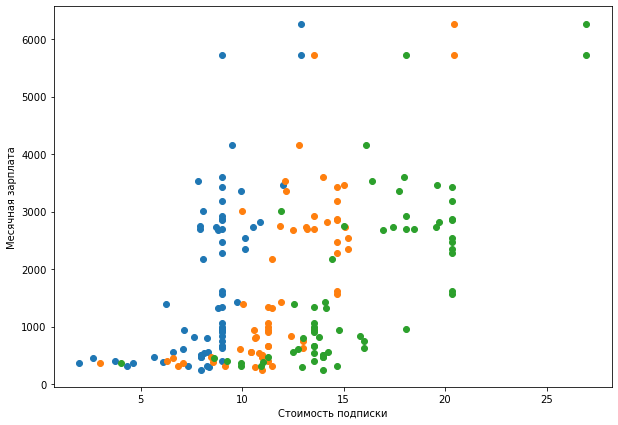

In [73]:
plt.figure(figsize=(10, 7))
plt.scatter(netflix_data_full['Cost Per Month - Basic ($)'], netflix_data_full['salary'], marker='o', label='Basic');
plt.scatter(netflix_data_full['Cost Per Month - Standard ($)'], netflix_data_full['salary'], marker='o', label='Standard');
plt.scatter(netflix_data_full['Cost Per Month - Premium ($)'], netflix_data_full['salary'], marker='o',label='Premium');
plt.xlabel('Стоимость подписки')
plt.ylabel('Месячная зарплата')
plt.show()

Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны. 

In [74]:
netflix_data_full.head(2)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),salary,continent,Currency
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,398.14,South America,ARS
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,3523.02,Oceania,AUD


In [92]:
display(netflix_data_full.groupby('Currency')['Cost Per Month - Basic ($)']
        .mean()
        .reset_index()
        .sort_values(by='Cost Per Month - Basic ($)',ascending=False)
        .head(5)
       )
display(netflix_data_full.groupby('Currency')['Cost Per Month - Standard ($)']
        .mean()
        .reset_index()
        .sort_values(by='Cost Per Month - Standard ($)',ascending=False)
        .head(5)
       )
display(netflix_data_full.groupby('Currency')['Cost Per Month - Premium ($)']
        .mean()
        .reset_index()
        .sort_values(by='Cost Per Month - Premium ($)',ascending=False)
        .head(5)
       )

,Currency,Cost Per Month - Basic ($)
4,CHF,12.88
8,DKK,12.00
26,SEK,10.90
14,ILS,10.56
20,NOK,9.94


,Currency,Cost Per Month - Standard ($)
4,CHF,20.46
14,ILS,15.05
8,DKK,15.04
26,SEK,14.20
10,GBP,13.20


,Currency,Cost Per Month - Premium ($)
4,CHF,26.96
26,SEK,19.70
8,DKK,19.60
14,ILS,19.54
10,GBP,18.48


Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента

In [94]:
display(netflix_data_full.groupby('continent')['Cost Per Month - Basic ($)']
        .mean()
        .reset_index()
        .sort_values(by='Cost Per Month - Basic ($)',ascending=False)
       )
display(netflix_data_full.groupby('continent')['Cost Per Month - Standard ($)']
        .mean()
        .reset_index()
        .sort_values(by='Cost Per Month - Standard ($)',ascending=False)
       )
display(netflix_data_full.groupby('continent')['Cost Per Month - Premium ($)']
        .mean()
        .reset_index()
        .sort_values(by='Cost Per Month - Premium ($)',ascending=False)
       )

,continent,Cost Per Month - Basic ($)
2,Europe,9.230294
4,Oceania,8.320000
3,North America,8.081667
1,Asia,7.636667
5,South America,6.709000
0,Africa,6.260000


,continent,Cost Per Month - Standard ($)
2,Europe,13.304412
4,Oceania,12.325000
3,North America,11.876667
1,Asia,10.404167
0,Africa,10.050000
5,South America,9.619000


,continent,Cost Per Month - Premium ($)
2,Europe,17.545588
4,Oceania,16.665000
3,North America,15.205000
1,Asia,12.966667
0,Africa,12.580000
5,South America,12.555000


Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?

In [108]:
netflix_data_full[netflix_data_full['Country'] == 'Czechia']

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),salary,continent,Currency
12,cz,Czechia,7325,5234,2091,8.83,11.49,14.15,1328.08,Europe,CZK


In [112]:
print('Basic/Salary for Czechia =',netflix_data_full[netflix_data_full['Country'] == 'Czechia']['Cost Per Month - Basic ($)'].values[0]/ \
       netflix_data_full[netflix_data_full['Country'] == 'Czechia']['salary'].values[0]
       )
print('Standard/Salary for Czechia =',netflix_data_full[netflix_data_full['Country'] == 'Czechia']['Cost Per Month - Standard ($)'].values[0]/ \
       netflix_data_full[netflix_data_full['Country'] == 'Czechia']['salary'].values[0]
       )
print('Premium/Salary for Czechia =',netflix_data_full[netflix_data_full['Country'] == 'Czechia']['Cost Per Month - Premium ($)'].values[0]/ \
       netflix_data_full[netflix_data_full['Country'] == 'Czechia']['salary'].values[0]
       )

Basic/Salary for Czechia = 0.006648695861695079
Standard/Salary for Czechia = 0.008651587253779893
Premium/Salary for Czechia = 0.010654478645864707


Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?

In [124]:
display(netflix_data_full[['Country','No. of TV Shows']].sort_values(by='No. of TV Shows',ascending=False).head(5))

,Country,No. of TV Shows
12,Czechia,5234
51,Slovakia,5055
6,Bulgaria,4819
24,Hungary,4802
61,United Kingdom,4551


Какой процент среднего дохода россиянина будет составлять подписка Netflix?

In [125]:
netflix_data_full[netflix_data_full['Country'] == 'Russia']

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),salary,continent,Currency
48,ru,Russia,5711,3624,2087,8.13,10.84,13.56,542.05,Europe,RUB


In [126]:
print('Basic/Salary for Russia =',netflix_data_full[netflix_data_full['Country'] == 'Russia']['Cost Per Month - Basic ($)'].values[0]/ \
       netflix_data_full[netflix_data_full['Country'] == 'Russia']['salary'].values[0]
       )
print('Standard/Salary for Russia =',netflix_data_full[netflix_data_full['Country'] == 'Russia']['Cost Per Month - Standard ($)'].values[0]/ \
       netflix_data_full[netflix_data_full['Country'] == 'Russia']['salary'].values[0]
       )
print('Premium/Salary for Russia =',netflix_data_full[netflix_data_full['Country'] == 'Russia']['Cost Per Month - Premium ($)'].values[0]/ \
       netflix_data_full[netflix_data_full['Country'] == 'Russia']['salary'].values[0]
       )

Basic/Salary for Russia = 0.01499861636380408
Standard/Salary for Russia = 0.01999815515173877
Premium/Salary for Russia = 0.02501614242228577


На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)

Смотрю на каком месте по индексу строки:

In [132]:
netflix_data_full['Cost_Per_Title_Basic'] = netflix_data_full['Cost Per Month - Basic ($)']/netflix_data_full_2['Total Library Size']
netflix_data_full['Cost_Per_Title_Standard'] = netflix_data_full['Cost Per Month - Standard ($)']/netflix_data_full_2['Total Library Size']
netflix_data_full['Cost_Per_Title_Premium'] = netflix_data_full['Cost Per Month - Premium ($)']/netflix_data_full_2['Total Library Size']

In [141]:
c1 = netflix_data_full.sort_values(by='Cost_Per_Title_Basic',ascending=True).reset_index(drop=True)
display(c1[c1['Country'] == 'Russia'])
c1 = netflix_data_full.sort_values(by='Cost_Per_Title_Standard',ascending=True).reset_index(drop=True)
display(c1[c1['Country'] == 'Russia'])
c1 = netflix_data_full.sort_values(by='Cost_Per_Title_Premium',ascending=True).reset_index(drop=True)
display(c1[c1['Country'] == 'Russia'])

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),salary,continent,Currency,Cost_Per_Title_Basic,Cost_Per_Title_Standard,Cost_Per_Title_Premium
25,ru,Russia,5711,3624,2087,8.13,10.84,13.56,542.05,Europe,RUB,0.001424,0.001898,0.002374


,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),salary,continent,Currency,Cost_Per_Title_Basic,Cost_Per_Title_Standard,Cost_Per_Title_Premium
17,ru,Russia,5711,3624,2087,8.13,10.84,13.56,542.05,Europe,RUB,0.001424,0.001898,0.002374


,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),salary,continent,Currency,Cost_Per_Title_Basic,Cost_Per_Title_Standard,Cost_Per_Title_Premium
17,ru,Russia,5711,3624,2087,8.13,10.84,13.56,542.05,Europe,RUB,0.001424,0.001898,0.002374


В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

In [144]:
display(netflix_data_full.sort_values(by='Cost_Per_Title_Basic',ascending=True).head(1))



,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),salary,continent,Currency,Cost_Per_Title_Basic,Cost_Per_Title_Standard,Cost_Per_Title_Premium
59,tr,Turkey,4639,2930,1709,1.97,3.0,4.02,366.56,Asia,TRY,0.000425,0.000647,0.000867
